Dataset is from the link: https://www.kaggle.com/techsash/waste-classification-data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

Let us view some of the images of **Messy** type

plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/0.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/1.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/2.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/3.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/4.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/5.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/6.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/7.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/8.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train/messy/9.jpg")
plt.imshow(img)


Let us now view some images of **Recycle** type

plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_8589.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("F:/Kaggle/Datasets/waste-classification-data/DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

In [3]:
print(tf.__version__)

2.5.0


Setting the data directory

In [4]:
train_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/train"
validation_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/val"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Formation of CNN

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

The following is the model summary of the model:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

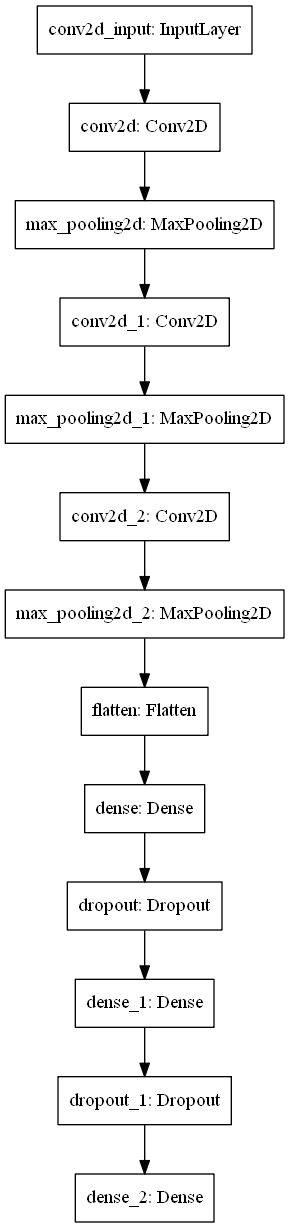

In [7]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

Specifying the optimizers

In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Fitting the model

In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=20
                              )

Epoch 1/20
10/10 [==============================] - 2s 225ms/step - loss: 0.0190 - acc: 0.9948 - val_loss: 0.8085 - val_acc: 0.7000
Epoch 2/20
10/10 [==============================] - 2s 237ms/step - loss: 0.1305 - acc: 0.9479 - val_loss: 0.8111 - val_acc: 0.7000
Epoch 3/20
10/10 [==============================] - 2s 216ms/step - loss: 0.0435 - acc: 0.9844 - val_loss: 1.3691 - val_acc: 0.6500
Epoch 4/20
10/10 [==============================] - 2s 245ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.6265 - val_acc: 0.7000
Epoch 5/20
10/10 [==============================] - 2s 227ms/step - loss: 9.9489e-04 - acc: 1.0000 - val_loss: 1.4684 - val_acc: 0.6500
Epoch 6/20
10/10 [==============================] - 2s 238ms/step - loss: 1.7902e-04 - acc: 1.0000 - val_loss: 1.5493 - val_acc: 0.6000
Epoch 7/20
10/10 [==============================] - 2s 228ms/step - loss: 1.5693e-04 - acc: 1.0000 - val_loss: 1.6513 - val_acc: 0.6000
Epoch 8/20
10/10 [==============================] - 2s 234ms/ste

Hence, we see that sufficient accuracy has been met at 5th epoch. However, anyone can run this model by increasing number of epoches or any other parameters.

In [15]:
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/images/test"
test_generator =  test2_datagen.flow_from_directory(test_dir,
                                                    batch_size=6,
                                                    class_mode  = None,
                                                    target_size = (150, 150),
                                                    shuffle=False)

Found 10 images belonging to 1 classes.


In [16]:
y_prob = model.predict_generator(test_generator,callbacks=[monitor])
y_pred = ["M" if probs > 0.5 else "C" for probs in y_prob]
y_pred

['C', 'C', 'M', 'M', 'M', 'M', 'C', 'M', 'M', 'C']

In [12]:
y_prob

array([[0.08883595],
       [0.02105051],
       [0.6606106 ],
       [0.99117243],
       [0.55745506],
       [0.6934085 ],
       [0.01152578],
       [0.795941  ],
       [0.77157223],
       [0.00844604]], dtype=float32)